<h3><b>Data Science & Business Analytics</b></h3>
<h3><b>Author: Swastika Banskota</b></h3>

<h3><b>Task 2: </b>Exploratory Data Analysis - Retail</h3>

GRIP @ The Sparks Foundation

For you to get any kind of answers from the data, it is very important to understand the data and gather as much insights from the data as you can. Before playing with the data and getting dirty with it, it is imperative to make sense of those data. That is what EDA is all about. 

In simple terms, EDA (Exploratory Data Analysis) is the process of performing initial investigation on the data to uncover patterns, detect anomalies, test for hypothesis, and check assumptions. And it is done with statistics and visual representation. EDA can be done graphically and non-graphically and is divided into univariate or multivariate.

Moreover, the data has to be clean and in a suitable form before applying any Machine Learning Algorithm to it. Exploratory Data Analysis (EDA) is analysing the recurring patterns and significant correlations present in the data. Basically, understanding the data in depth and analysing various characteristics of the data with visualization.

It is important to know the pattern in the data, to determine which variables are importamt and which play a significant role in the output. EDA allows us to :
1. Gather insights on the data to have better sense of it.<br>
2. Removes irregularities from the data.<br>
3. Helps in choosing better machine learning model and get accurate results. 


Lets get started with EDA on the Retail data and analyze areas of loss and where more profit can be made.

<h3>Importing Libraries</h3>

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

<h3>Loading the data</h3>

In [91]:
data = pd.read_csv('SampleSuperstore.csv')

<h3>Basic Data Exploration</h3>

In [92]:
#Top 5 rows of the data
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [93]:
#Total rows and columns
data.shape

(9994, 13)

In [94]:
#Checking datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [95]:
#Getting summary statistics
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


C:\Users\Swastika\AppData\Local\Temp\ipykernel_13636\182583526.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


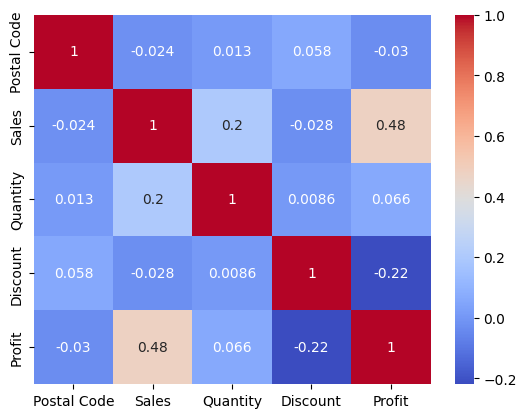

In [96]:
#Using correlation matrix to identify the linear relationship between numeric variables
#visualizing the correaltion matrix with heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

From the above heatmap, we can see that the Profit and Sales and Profit and Quantity have positive correlation of 0.48 and 0.2 respectively, however the Profit and Discount have the negative correlation of -0.22. Other correlation values can be neglected, as they don't have much effect on the Profit.

<h3>Data Cleaning </h3>

In [97]:
#Looking for missing data
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [98]:
#Checking duplicate data
print(data.duplicated().any())
print(data.duplicated().sum())

True
17


In [99]:
#Removing duplicates
data = data.drop_duplicates()
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<h3>Anomalies Check</h3>

Quantity

In [100]:
#Detecting anomalies with descriptive statistics
#Usinf z-scores to see how far the data points are from the mean 
z_scores = zscore(data['Quantity'])
outliers = (z_scores>3)|(z_scores<-3)
anomalous_data = data[outliers]
anomalous_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
113,Second Class,Consumer,United States,Columbus,Ohio,43229,East,Office Supplies,Fasteners,40.096,14,0.2,14.5348
139,Standard Class,Consumer,United States,Roseville,California,95661,West,Furniture,Furnishings,43.120,14,0.0,20.6976
147,Standard Class,Corporate,United States,Franklin,Wisconsin,53132,Central,Technology,Phones,384.450,11,0.0,103.8015
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003
342,Second Class,Corporate,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Fasteners,30.992,13,0.2,10.0724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,Standard Class,Corporate,United States,Hampton,Virginia,23666,South,Furniture,Chairs,500.240,13,0.0,145.0696
9882,First Class,Consumer,United States,Woodstock,Georgia,30188,South,Technology,Accessories,272.610,13,0.0,98.1396
9895,Standard Class,Consumer,United States,Chicago,Illinois,60623,Central,Technology,Accessories,153.824,11,0.2,38.4560
9941,Standard Class,Consumer,United States,San Francisco,California,94122,West,Technology,Accessories,223.580,14,0.0,87.1962


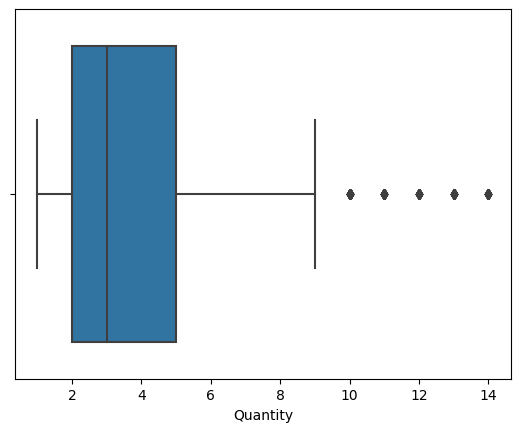

In [101]:
#Visualizing with box plots
sns.boxplot(x = data['Quantity'])
plt.show()

In the above box plot, the line that is splitting the box in two is the median value. The left edge of the box represents the lower quartile value and the right edge represents the upper quartile value. The black lines on the two sides of the box are the whiskes. The left whisker show the minimum data value and the right shows the maximum data value. And the single points on the diagram are the outliers.

Sales

In [102]:
z_scores = zscore(data['Sales'])
outliers = (z_scores>3)|(z_scores<-3)
anomalous_data = data[outliers]
anomalous_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003
262,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,3059.982,3,0.4,-509.9970
263,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,2519.958,7,0.4,-251.9958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Furniture,Bookcases,4404.900,5,0.0,1013.1270
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
9857,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Furniture,Tables,3393.680,8,0.0,610.8624
9929,Same Day,Consumer,United States,San Francisco,California,94122,West,Technology,Copiers,2799.960,5,0.2,944.9865


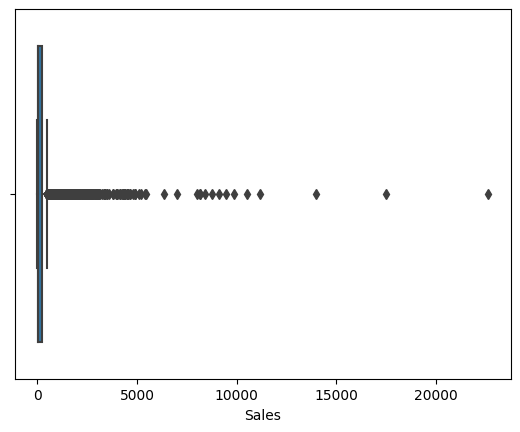

In [103]:
sns.boxplot(x = data['Sales'])
plt.show()

Discount

In [104]:
z_scores = zscore(data['Discount'])
outliers = (z_scores>3)|(z_scores<-3)
anomalous_data = data[outliers]
anomalous_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
75,First Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1.248,3,0.8,-1.9344
101,Standard Class,Home Office,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,1.788,3,0.8,-3.0396
169,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Appliances,177.980,5,0.8,-453.8490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,Second Class,Consumer,United States,Houston,Texas,77070,Central,Office Supplies,Binders,18.240,3,0.8,-31.0080
9795,Standard Class,Corporate,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,3.798,3,0.8,-5.8869
9808,Standard Class,Consumer,United States,Chicago,Illinois,60623,Central,Office Supplies,Binders,2.112,2,0.8,-3.3792
9835,First Class,Consumer,United States,La Porte,Texas,77571,Central,Office Supplies,Binders,16.392,2,0.8,-26.2272


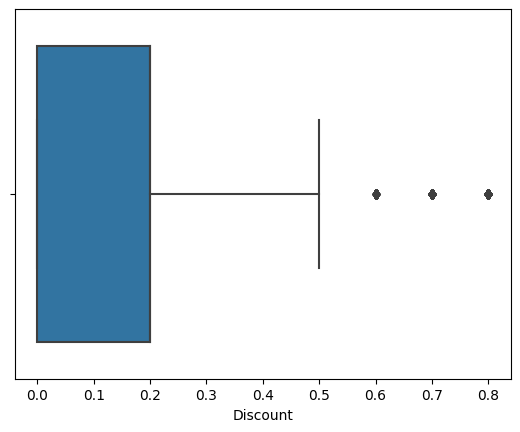

In [105]:
sns.boxplot(x = data['Discount'])
plt.show()

Profit

In [106]:
z_scores = zscore(data['Profit'])
outliers = (z_scores>3)|(z_scores<-3)
anomalous_data = data[outliers]
anomalous_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
215,Standard Class,Corporate,United States,Medina,Ohio,44256,East,Technology,Machines,1188.000,9,0.7,-950.4000
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900
353,First Class,Home Office,United States,New York City,New York,10009,East,Office Supplies,Binders,4355.168,4,0.2,1415.4296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
9741,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Furniture,Bookcases,4404.900,5,0.0,1013.1270
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
9929,Same Day,Consumer,United States,San Francisco,California,94122,West,Technology,Copiers,2799.960,5,0.2,944.9865


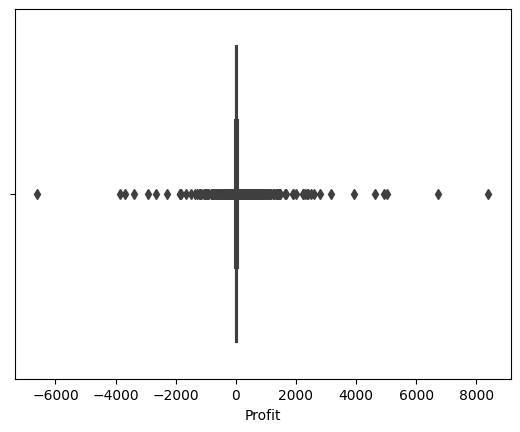

In [107]:
sns.boxplot(x = data['Profit'])
plt.show()

<h3>Dependent and Independent Variables</h3>

Extracting dependent and independent variables.

x being independent and y being dependent variable.

In [108]:
x = data.iloc[:, :-1]
x

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00


In [109]:
y = data.iloc[:, 12]
y

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9977, dtype: float64

<h3>Exploring Columns</h3>

Ship Mode

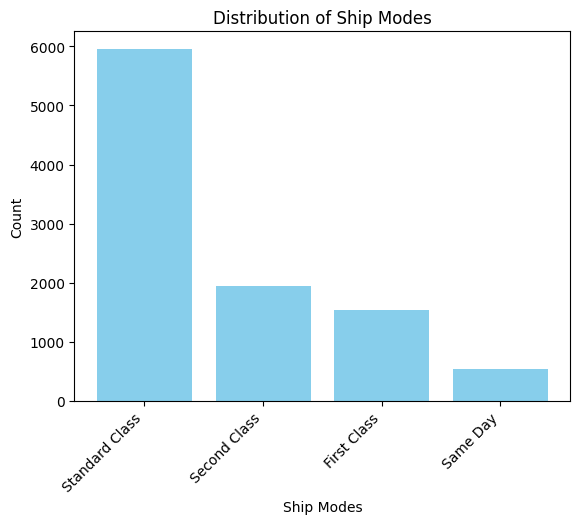

In [110]:
# Count the occurrences of each category
category_counts = data['Ship Mode'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Ship Modes')
plt.ylabel('Count')
plt.title('Distribution of Ship Modes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Segment

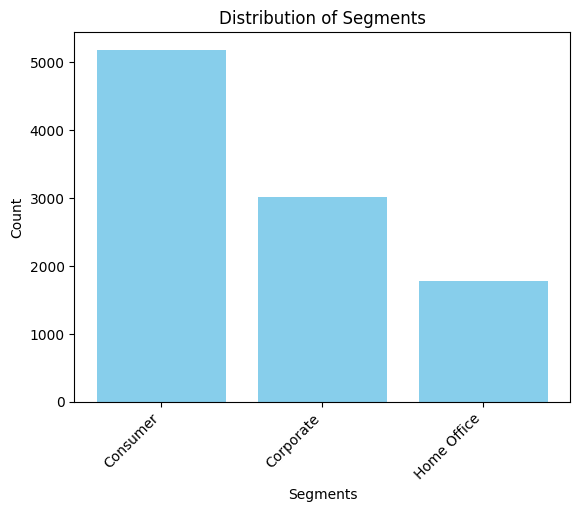

In [111]:
# Count the occurrences of each category
category_counts = data['Segment'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Segments')
plt.ylabel('Count')
plt.title('Distribution of Segments')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

City

In [112]:
data['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

State

In [113]:
data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Discount

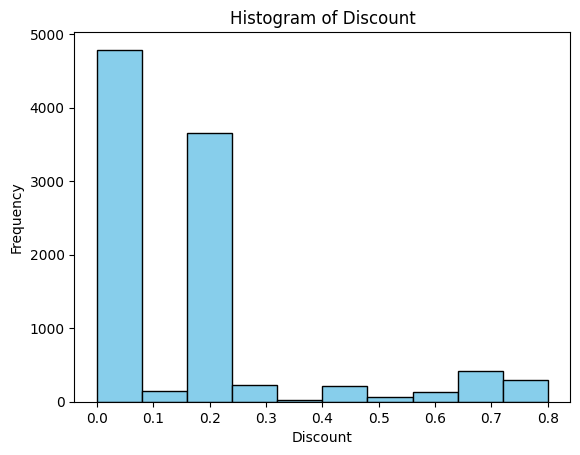

In [114]:
# Create a histogram
plt.hist(data['Discount'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Histogram of Discount')

# Show the plot
plt.show()

<h3>Exploring General Trends</h3>

1. Analyzing the data.
2. Analying total sales and profit.
3. Analyzing sales and profit by different variables.
4. Analyzing the areas of loss and where more profit can be made. 

a. Sales and Profit Overview

In [115]:
# Total Sales and Profit
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()

print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Profit: ${total_profit:.2f}')

Total Sales: $2296195.59
Total Profit: $286241.42


In [116]:
ProfitRatio = sum(data['Profit']/sum(data['Sales']))
ProfitRatio

0.12465898976951174

b. Sales and Profit by Ship Mode

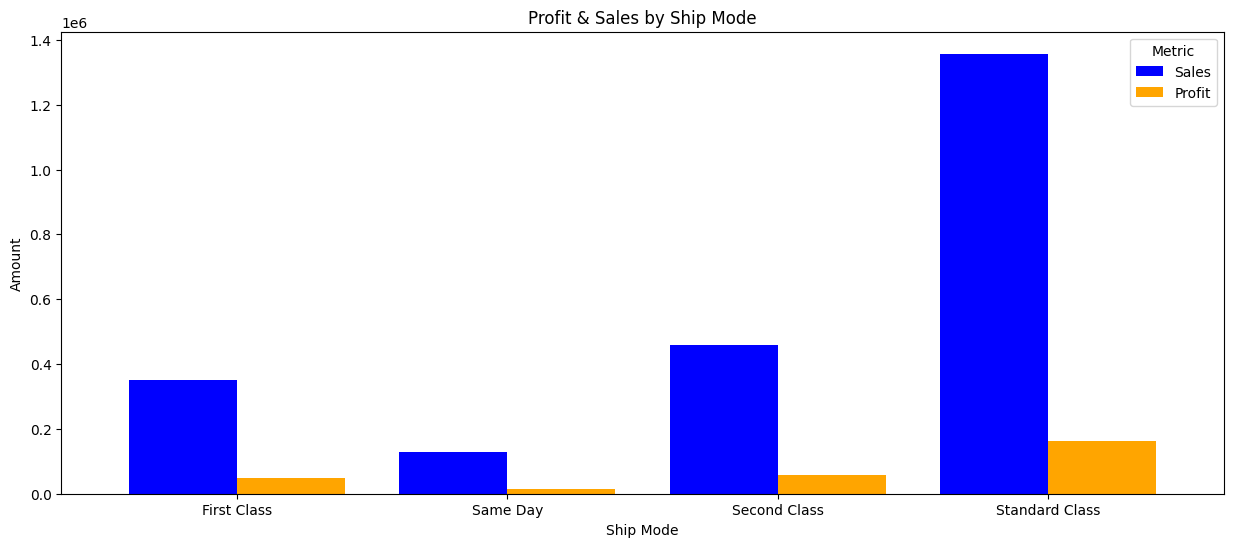

In [117]:
# Group by Ship Mode and sum Sales and Profit
ship_mode = data.groupby('Ship Mode')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
ship_mode.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=0)

# Show the plot
plt.show()



c. Sales and Profit by Segment

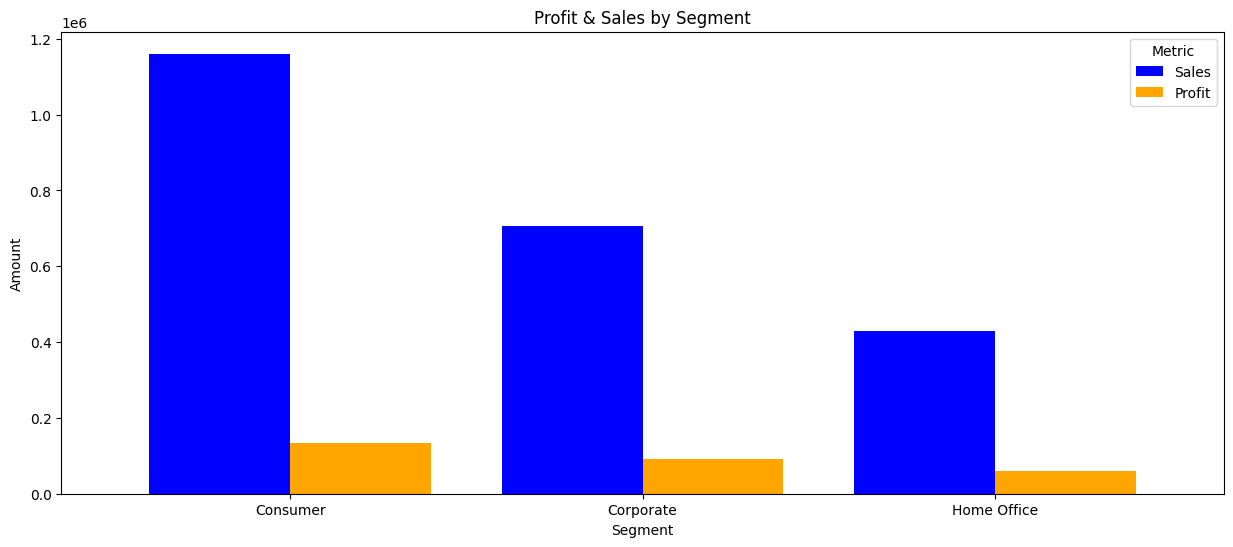

In [118]:
# Group by Segment and sum Sales and Profit
segment = data.groupby('Segment')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
segment.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=0)

# Show the plot
plt.show()

d. Sales and Profit by Category

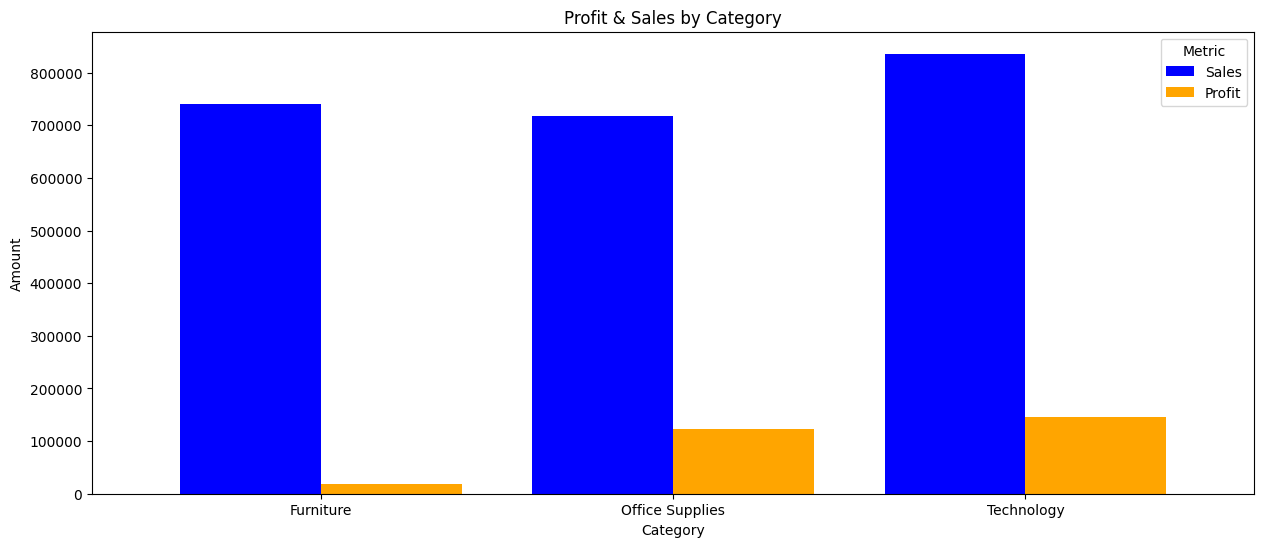

In [119]:
# Group by Category and sum Sales and Profit
category = data.groupby('Category')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
category.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=0)

# Show the plot
plt.show()


e. Sales and Profit by Sub-Category

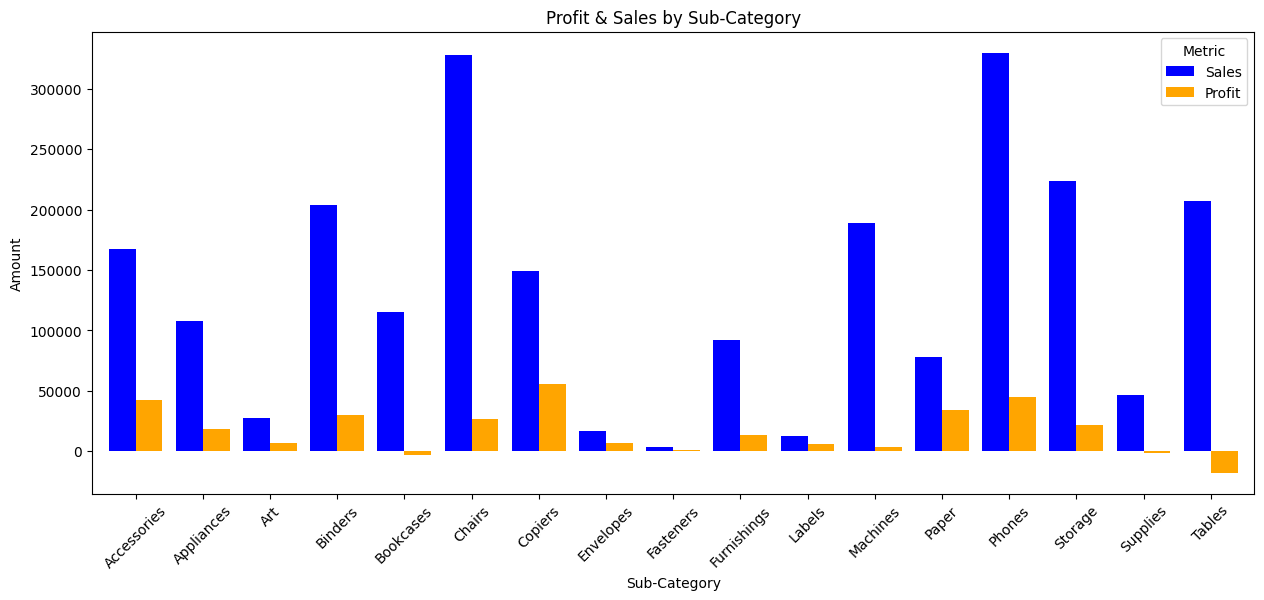

In [120]:
# Group by Sub-Category and sum Sales and Profit
sub_category = data.groupby('Sub-Category')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
sub_category.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=45)

# Show the plot
plt.show()

f. Sales and Profit by Region

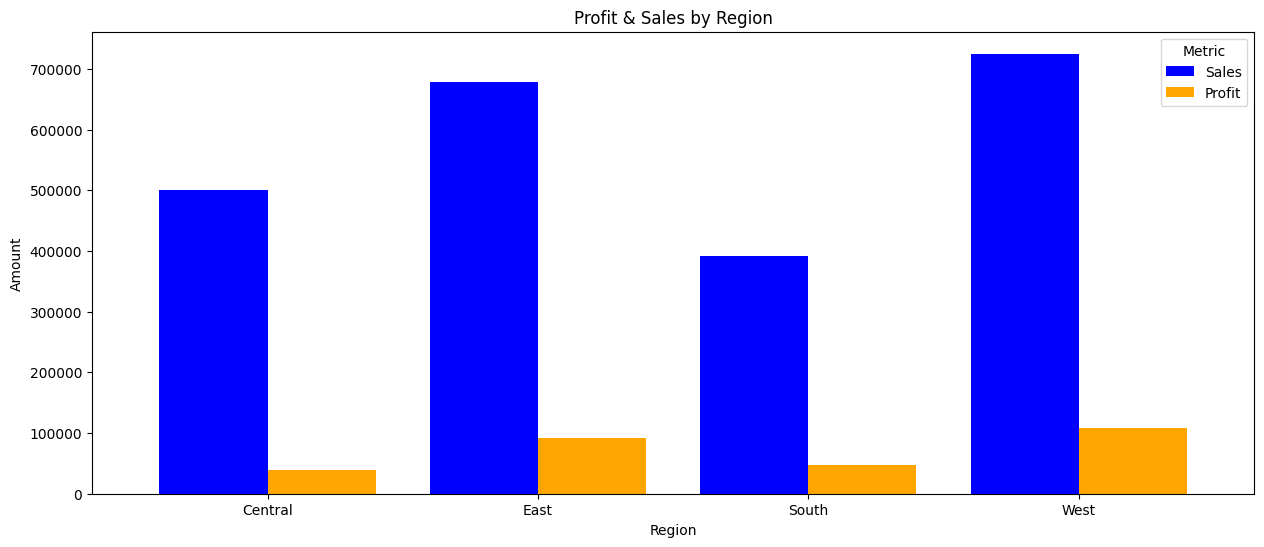

In [121]:
# Group by Region and sum Sales and Profit
region = data.groupby('Region')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
region.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=0)

# Show the plot
plt.show()


g. Sales and Profit by State

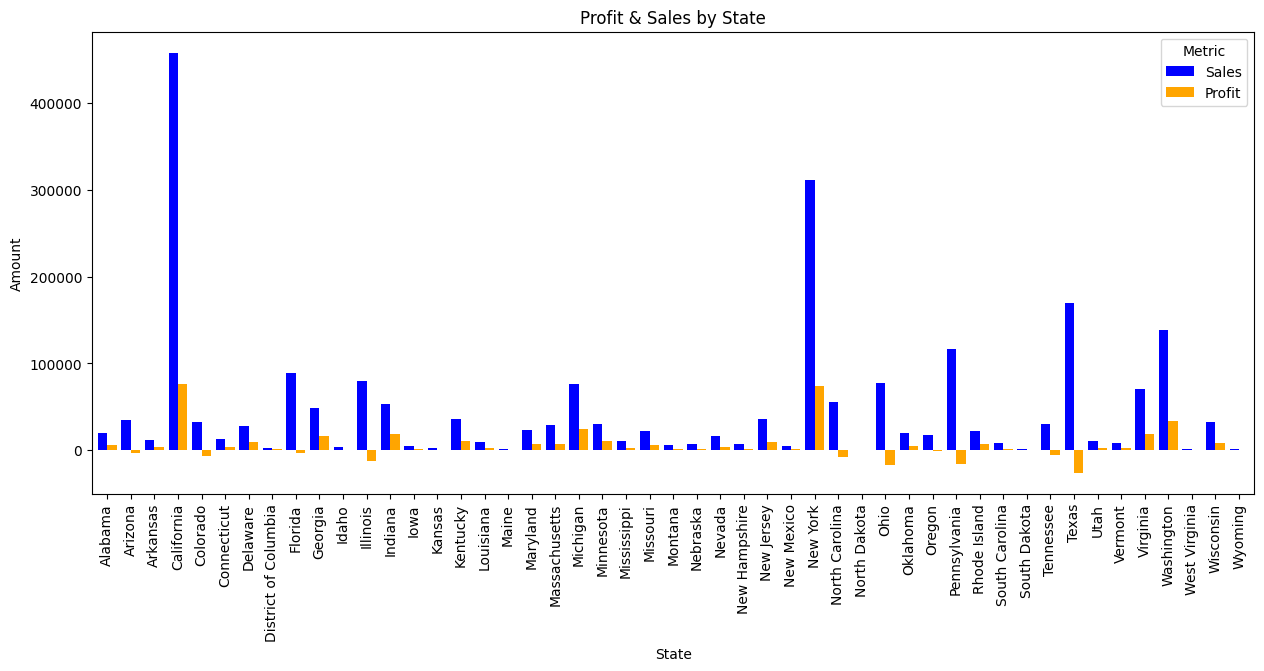

In [122]:
# Group by State and sum Sales and Profit
state = data.groupby('State')[['Sales', 'Profit']].sum()

# Plot grouped bar chart
state.plot(kind='bar', figsize=(15, 6), width=0.8, color=['blue', 'orange'])

# Titles and labels
plt.title('Profit & Sales by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales', 'Profit'])
plt.xticks(rotation=90)

# Show the plot
plt.show()

h. Discounts and Profitability

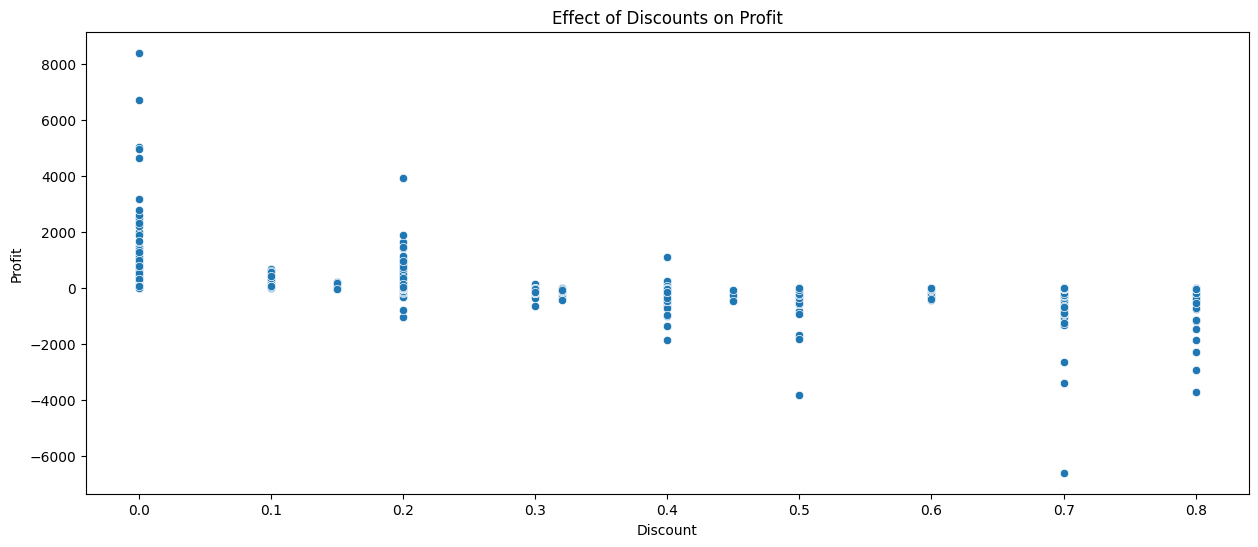

In [123]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Effect of Discounts on Profit')
plt.show()


<H3>Analysis and Recommendations</H3>

From the EDA performed we can work on the following areas for more profit:

1. Work on shipping strategies.
2. Focus on high profit categories like Technology.
3. Implement strategies on Furniture where there is maximum loss.
4. Do business more on West region and California and New York states state for more profit.
5. Improve the quality of the products.